# HACKTONS

This analysis aims to provide insight and visualize information generated from Seasonal Agriculture Survey

## Preparing data


### Libraries

In [1]:
import warnings
from glob import glob
import glob
import os
import pandas as pd
#import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
#import seaborn as sns
#import wqet_grader
#from category_encoders import OneHotEncoder
from IPython.display import VimeoVideo
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact
#from sklearn.impute import SimpleImputer
#from sklearn.linear_model import LinearRegression, Ridge  # noqa F401
#from sklearn.metrics import mean_absolute_error
#from sklearn.pipeline import make_pipeline
#from sklearn.utils.validation import check_is_fitted

warnings.simplefilter(action="ignore", category=FutureWarning)


### Importing data

# here

In [2]:
import pandas as pd
import glob

def wrangle(filepath):
    df = pd.read_csv(filepath)

    # Replace specific values with 0
    df.fillna(0, inplace=True)
    df.replace('_', 0, inplace=True)
    df.replace('-', 0, inplace=True)
   
    return df


data_pattern = r"C:\Users\fabiola\Desktop\HACKTONSSS\Data\Table_*.csv"

# Use glob to find the file paths
files = glob.glob(data_pattern)

# Create a list to store DataFrames
frames = []

# Iterate over the files and apply the wrangle function
for file in files:
    df = wrangle(file)
    print(f"Processing {file}, df_shape: {df.shape}")
    frames.append(df)




Processing C:\Users\fabiola\Desktop\HACKTONSSS\Data\Table_1.csv, df_shape: (162, 7)
Processing C:\Users\fabiola\Desktop\HACKTONSSS\Data\Table_10.csv, df_shape: (42, 5)
Processing C:\Users\fabiola\Desktop\HACKTONSSS\Data\Table_11.csv, df_shape: (30, 4)
Processing C:\Users\fabiola\Desktop\HACKTONSSS\Data\Table_12.csv, df_shape: (27, 3)
Processing C:\Users\fabiola\Desktop\HACKTONSSS\Data\Table_13.csv, df_shape: (30, 6)
Processing C:\Users\fabiola\Desktop\HACKTONSSS\Data\Table_14.csv, df_shape: (30, 6)
Processing C:\Users\fabiola\Desktop\HACKTONSSS\Data\Table_2.csv, df_shape: (180, 4)
Processing C:\Users\fabiola\Desktop\HACKTONSSS\Data\Table_3.csv, df_shape: (90, 3)
Processing C:\Users\fabiola\Desktop\HACKTONSSS\Data\Table_4.csv, df_shape: (98, 3)
Processing C:\Users\fabiola\Desktop\HACKTONSSS\Data\Table_5.csv, df_shape: (1677, 4)
Processing C:\Users\fabiola\Desktop\HACKTONSSS\Data\Table_6.csv, df_shape: (90, 3)
Processing C:\Users\fabiola\Desktop\HACKTONSSS\Data\Table_7.csv, df_shape: (68

## Cleaning dataframe 1: Area and Yield

In [3]:
# Access first dataframe
df1 = frames[0]

In [4]:
print(df1.shape)
df1.info()
df1.head()


(162, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Crops                        162 non-null    object
 1   Year                         162 non-null    int64 
 2   Season                       162 non-null    object
 3   Cultivated Area              162 non-null    object
 4   Harvested Area               162 non-null    object
 5   Production of crop           162 non-null    object
 6   yield of major crop (kg/ha)  162 non-null    object
dtypes: int64(1), object(6)
memory usage: 9.0+ KB


Crops  Year Season Cultivated Area Harvested Area Production of crop  \
0  Maize  2020      A          221521         221521             353999   
1  Maize  2020      B           72918          72918              94634   
2  Maize  2020      C               0              0                  0   
3  Maize  2021      A          236642         236642             378641   
4  Maize  2021      B           80570          80570             104041   

  yield of major crop (kg/ha)  
0                        1598  
1                        1298  
2                           0  
3                        1600  
4                        1291

In [5]:
df1.head()

Crops  Year Season Cultivated Area Harvested Area Production of crop  \
0  Maize  2020      A          221521         221521             353999   
1  Maize  2020      B           72918          72918              94634   
2  Maize  2020      C               0              0                  0   
3  Maize  2021      A          236642         236642             378641   
4  Maize  2021      B           80570          80570             104041   

  yield of major crop (kg/ha)  
0                        1598  
1                        1298  
2                           0  
3                        1600  
4                        1291

## Cleaning dataframe2: fertilizers

In [6]:
df2=frames[6]
print(df2.shape)
df2.info()
df2.head()

(180, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   District                                        180 non-null    object
 1   Season                                          180 non-null    object
 2   Fertlizer apply                                 180 non-null    object
 3   Agricultural area under fertirizer application  180 non-null    object
dtypes: object(4)
memory usage: 5.8+ KB


District Season        Fertlizer apply  \
0  Bugesera      A  Inorganic Fertilizers   
1  Bugesera      B  Inorganic Fertilizers   
2  Bugesera      C  Inorganic Fertilizers   
3  Bugesera      A    Organic fertilizers   
4  Bugesera      B    Organic fertilizers   

  Agricultural area under fertirizer application  
0                                       20323.49  
1                                          14500  
2                                       85.56758  
3                                       28611.85  
4                                       19653.89

In [7]:
df2['District'] = df2['District'].replace('Nyarugunge', 'Nyarugenge')
df2.head()

District Season        Fertlizer apply  \
0  Bugesera      A  Inorganic Fertilizers   
1  Bugesera      B  Inorganic Fertilizers   
2  Bugesera      C  Inorganic Fertilizers   
3  Bugesera      A    Organic fertilizers   
4  Bugesera      B    Organic fertilizers   

  Agricultural area under fertirizer application  
0                                       20323.49  
1                                          14500  
2                                       85.56758  
3                                       28611.85  
4                                       19653.89

In [8]:
df2 = df2.pivot(index=['District', 'Season'], columns='Fertlizer apply', values='Agricultural area under fertirizer application').reset_index()
df2.rename(columns={'Inorganic Fertilizers': 'Agricultural area under Inorganic Fertilizers', 'Organic fertilizers': 'Agricultural area under Organic Fertilizers'}, inplace=True)
df2 = df2.fillna(0)

In [9]:

#df2 = df2.set_index("Fertlizer apply")
print(df2.columns)


Index(['District', 'Season', 'Agricultural area under Inorganic Fertilizers',
       'Agricultural area under Organic Fertilizers'],
      dtype='object', name='Fertlizer apply')


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   District                                       90 non-null     object
 1   Season                                         90 non-null     object
 2   Agricultural area under Inorganic Fertilizers  90 non-null     object
 3   Agricultural area under Organic Fertilizers    90 non-null     object
dtypes: object(4)
memory usage: 2.9+ KB


## Cleaning Dataframe 3: Irrigation

In [11]:
df3=frames[7]
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 3 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   District                                  90 non-null     object
 1   Season                                    90 non-null     object
 2   Agriculture land under modern irrigation  90 non-null     object
dtypes: object(3)
memory usage: 2.2+ KB


In [12]:
df3["Agriculture land under modern irrigation"]

0     2907.00
1     1533.25
2      113.94
3           0
4           0
       ...   
85          0
86          0
87    1361.00
88     654.39
89          0
Name: Agriculture land under modern irrigation, Length: 90, dtype: object

In [13]:
df3[["Agriculture land under modern irrigation"]].nunique()

Agriculture land under modern irrigation    71
dtype: int64

In [14]:
# Assuming you have a DataFrame df3
# Convert the column to numeric and handle non-numeric values by converting them to NaN
df3["Agriculture land under modern irrigation"] = pd.to_numeric(df3["Agriculture land under modern irrigation"], errors='coerce')

# Now, the column contains numeric values and NaN for non-numeric values


In [15]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 3 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   District                                  90 non-null     object 
 1   Season                                    90 non-null     object 
 2   Agriculture land under modern irrigation  90 non-null     float64
dtypes: float64(1), object(2)
memory usage: 2.2+ KB


In [16]:
# Define the custom sorting order for the "Season" column
season_order = ["A", "B", "C"]

# Sort the DataFrame by "District" and then "Season"
df3 = df3.sort_values(by=["District", "Season"], ascending=[True, False])

# Apply the custom sorting order for the "Season" column
df3["Season"] = pd.Categorical(df3["Season"], categories=season_order, ordered=True)
df3 = df3.sort_values(by=["District", "Season"])

# Reset the index to have a clean index after sorting
df3 = df3.reset_index(drop=True)

In [17]:
df3.shape

(90, 3)

## Cleaning Dataframe 4: GVA

In [18]:
frames[8].head(20)

Crop  Year  GVA_in_price
0        Maize  2016        402114
1        Maize  2017        309457
2        Maize  2018        365527
3        Maize  2019        373066
4        Maize  2020        389059
5        Maize  2021        387754
6        Maize  2022        390303
7      Sorghum  2016        274987
8      Sorghum  2017        296000
9      Sorghum  2018        298689
10     Sorghum  2019        274485
11     Sorghum  2020        280068
12     Sorghum  2021        299996
13     Sorghum  2022        302122
14  Paddy rice  2016       1304073
15  Paddy rice  2017       1633520
16  Paddy rice  2018       1492544
17  Paddy rice  2019       1718397
18  Paddy rice  2020       1691890
19  Paddy rice  2021       1799480

In [19]:
df4=frames[8]

In [20]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Crop          98 non-null     object
 1   Year          98 non-null     int64 
 2   GVA_in_price  98 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


Comment :No more cleaning of dataframe 4. We will use it to draw time serie graph of GVA on every crop and study on that trend, where slicers will also be used to predict for 2023 and 2024

## Cleaning DataFrame5  (Yield 2022)

In this data we will only deal with data in 2022. Were we will represent average yield per district on every crop. Seasonal graph will be used.

In [21]:
df5=frames[9]

In [22]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   District       1677 non-null   object 
 1   Crop           1677 non-null   object 
 2   Season         1677 non-null   object 
 3   Average yield  1677 non-null   float64
dtypes: float64(1), object(3)
memory usage: 52.5+ KB


# Map Preparation

In [23]:
import pandas as pd
##Importing 
file_path6 = r"C:\Users\fabiola\Desktop\TODAY\DATASET\data\map.csv"

# Read the Excel files into DataFrames
map= pd.read_csv(file_path6)

In [24]:
#map.head()

In [25]:
#map[['lat', 'lon']] = map['Lat long'].str.split(expand=True)

In [26]:
map.head()

District       lat       lon
0  bugesera -2.23456  30.14825
1    burera -1.47394  29.83468
2   gakenke -1.69810  29.78543
3    gasabo -1.88470  30.13141
4   gatsibo -1.59185  30.45535

 We are done with cleaningggggggggggggggggggggggggggggggggg

## Cleaning dataframe 6: Improved seeds

In [27]:
frames[10].head()
df6=frames[10]

In [28]:

# Remove "Season" from the "Season" column and keep only the letters
df6['Season'] = df6['Season'].str.replace('Season', '')

In [29]:
df6.head()

District Season  Used iproved seed_perc
0  Bugesera      A                   45.22
1  Bugesera      B                   18.20
2  Bugesera      C                   41.21
3    Burera      A                   39.52
4    Burera      B                    3.77

In [30]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   District                90 non-null     object 
 1   Season                  90 non-null     object 
 2   Used iproved seed_perc  90 non-null     float64
dtypes: float64(1), object(2)
memory usage: 2.2+ KB


## Cleaning dataframe7: Pesticides

In [31]:
frames[11].head()

District Season     Pesticide  Percentage_use
0  Bugesera      A       Dithane           20.78
1  Bugesera      A       Ridomil            0.44
2  Bugesera      A    Dimethoate           29.76
3  Bugesera      A  Cypermethrin           10.51
4  Bugesera      A      Dursiban            0.00

In [32]:
df7 = frames[11]



In [33]:
df7.columns

Index(['District', 'Season', 'Pesticide', 'Percentage_use'], dtype='object')

In [34]:
df7["Season"]

0      A
1      A
2      A
3      A
4      A
      ..
684    C
685    C
686    C
687    C
688    C
Name: Season, Length: 689, dtype: object

In [35]:
order = ['A', 'B', 'C']  # Adjust this list according to your desired order

# Convert 'Season' to Categorical with the custom order
frames[6]['Season'] = pd.Categorical(frames[6]['Season'], categories=order, ordered=True)

# Sort the DataFrame based on 'District' and the custom-ordered 'Season'
df7 = frames[6].sort_values(by=['District', 'Season'], ascending=[True, True])


In [36]:
print('df7_shape:', df7.shape)

df7.head(40)

df7_shape: (180, 4)


District Season        Fertlizer apply  \
0   Bugesera      A  Inorganic Fertilizers   
3   Bugesera      A    Organic fertilizers   
1   Bugesera      B  Inorganic Fertilizers   
4   Bugesera      B    Organic fertilizers   
2   Bugesera      C  Inorganic Fertilizers   
5   Bugesera      C    Organic fertilizers   
6     Burera      A  Inorganic Fertilizers   
9     Burera      A    Organic fertilizers   
7     Burera      B  Inorganic Fertilizers   
10    Burera      B    Organic fertilizers   
8     Burera      C  Inorganic Fertilizers   
11    Burera      C    Organic fertilizers   
12   Gakenke      A  Inorganic Fertilizers   
15   Gakenke      A    Organic fertilizers   
13   Gakenke      B  Inorganic Fertilizers   
16   Gakenke      B    Organic fertilizers   
14   Gakenke      C  Inorganic Fertilizers   
17   Gakenke      C    Organic fertilizers   
18    Gasabo      A  Inorganic Fertilizers   
21    Gasabo      A    Organic fertilizers   
19    Gasabo      B  Inorganic Fertilizers   
22    Gasabo      B    Organic fertilizers   
20    Gasabo      C  Inorganic Fertilizers   
23    Gasabo      C    Organic fertilizers   
24   Gatsibo      A  Inorganic Fertilizers   
27   Gatsibo      A    Organic fertilizers   
25   Gatsibo      B  Inorganic Fertilizers   
28   Gatsibo      B    Organic fertilizers   
26   Gatsibo      C  Inorganic Fertilizers   
29   Gatsibo      C    Organic fertilizers   
30   Gicumbi      A  Inorganic Fertilizers   
33   Gicumbi      A    Organic fertilizers   
31   Gicumbi      B  Inorganic Fertilizers   
34   Gicumbi      B    Organic fertilizers   
32   Gicumbi      C  Inorganic Fertilizers   
35   Gicumbi      C    Organic fertilizers   
36  Gisagara      A  Inorganic Fertilizers   
39  Gisagara      A    Organic fertilizers   
37  Gisagara      B  Inorganic Fertilizers   
40  Gisagara      B    Organic fertilizers   

   Agricultural area under fertirizer application  
0                                        20323.49  
3                                        28611.85  
1                                           14500  
4                                        19653.89  
2                                        85.56758  
5                                        68.20513  
6                                        13473.97  
9                                        24621.54  
7                                        9824.095  
10                                       20877.07  
8                                        2511.197  
11                                        2830.99  
12                                       24449.94  
15                                       38172.27  
13                                        16249.3  
16                                       32483.19  
14                                       243.4312  
17                                       253.2965  
18                                        4141.23  
21                                       11320.66  
19                                       2647.496  
22                                       9678.088  
20                                       208.8273  
23                                       285.7385  
24                                       22164.88  
27                                       44675.05  
25                                       14288.94  
28                                       36612.56  
26                                       91.97259  
29                                       110.2357  
30                                       12950.43  
33                                       36500.47  
31                                       9520.554  
34                                       31044.71  
32                                       196.2245  
35                                       318.1954  
36                                       14058.44  
39                                       23668.33  
37                                       8511.836  
40                                   

# Concatenating agriculture inputs

In [37]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 0 to 179
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   District                                        180 non-null    object  
 1   Season                                          180 non-null    category
 2   Fertlizer apply                                 180 non-null    object  
 3   Agricultural area under fertirizer application  180 non-null    object  
dtypes: category(1), object(3)
memory usage: 5.9+ KB


In [38]:

# Merge df2 and df6 on 'District' and 'Season'
merged_df = pd.merge(df2, df6, on=['District', 'Season'], how='outer')

# Merge tmerged_df with df7 on 'District' and 'Season'
final_df = pd.merge(merged_df, df7, on=['District', 'Season'], how='outer')


In [39]:
final_df.shape

(180, 7)

In [40]:
final_df.head()

District Season Agricultural area under Inorganic Fertilizers  \
0  Bugesera      A                                      20323.49   
1  Bugesera      A                                      20323.49   
2  Bugesera      B                                         14500   
3  Bugesera      B                                         14500   
4  Bugesera      C                                      85.56758   

  Agricultural area under Organic Fertilizers  Used iproved seed_perc  \
0                                    28611.85                   45.22   
1                                    28611.85                   45.22   
2                                    19653.89                   18.20   
3                                    19653.89                   18.20   
4                                    68.20513                   41.21   

         Fertlizer apply Agricultural area under fertirizer application  
0  Inorganic Fertilizers                                       20323.49  
1    Organic fertilizers                                       28611.85  
2  Inorganic Fertilizers                                          14500  
3    Organic fertilizers                                       19653.89  
4  Inorganic Fertilizers                                       85.56758

In [41]:
# Drop the repeated columns
final_df = final_df.loc[:, ~final_df.columns.duplicated()]

In [42]:
df3.head()

District Season  Agriculture land under modern irrigation
0  Bugesera      A                                   2907.00
1  Bugesera      B                                   1533.25
2  Bugesera      C                                    113.94
3    Burera      A                                      0.00
4    Burera      B                                      0.00

# Cleaning df8:Agricultural practices


In [43]:
#frames[10].head()

# ACTION 1 : Represent agriculture area

In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Crops                        162 non-null    object
 1   Year                         162 non-null    int64 
 2   Season                       162 non-null    object
 3   Cultivated Area              162 non-null    object
 4   Harvested Area               162 non-null    object
 5   Production of crop           162 non-null    object
 6   yield of major crop (kg/ha)  162 non-null    object
dtypes: int64(1), object(6)
memory usage: 9.0+ KB


In [45]:
df1['Cultivated Area'].nunique

<bound method IndexOpsMixin.nunique of 0      221521
1       72918
2           0
3      236642
4       80570
        ...  
157      8371
158         0
159     10914
160     10373
161         0
Name: Cultivated Area, Length: 162, dtype: object>

PPPPPPPPPPPPlease install dash before running this.   pip install dash in your cd

# ACTION 2: Represent Yield 

In [46]:
df5.head(10)

District           Crop Season  Average yield
0  Bugesera          Maize      A        1517.80
1  Bugesera        Sorghum      A         743.41
2  Bugesera     Paddy rice      A        5703.76
3  Bugesera          Wheat      A           0.00
4  Bugesera  Other cereals      A         610.67
5  Bugesera        Cassava      A       16634.31
6  Bugesera   Sweet potato      A        7320.47
7  Bugesera   Irish potato      A        2596.29
8  Bugesera    Yams & Taro      A           0.00
9  Bugesera        Bananas      A       10619.29

In [47]:
# The new dataframe to be used
filepath = r"C:\Users\fabiola\Desktop\TODAY\DATASET\data\map3.xlsx"


# Dataframes to be used

dfa=pd. read_excel(filepath, sheet_name= "origin")
dfb=pd. read_excel(filepath, sheet_name= "origin2")

In [48]:
# Remove extra spaces from column names
dfa = dfa.rename(columns={'District ': 'District', 'season ': 'season'})
dfb = dfb.rename(columns={'District ': 'District'})

# Merge df1 and df2 on the "District" column (many-to-one )
merged_df = dfa.merge(dfb, on='District', how='left')

In [49]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   District       1677 non-null   object 
 1   crops          1677 non-null   object 
 2   season         1677 non-null   object 
 3   average yield  1677 non-null   float64
 4   Lat-lon        0 non-null      float64
 5   Unnamed: 5     0 non-null      float64
 6   Unnamed: 6     0 non-null      float64
 7   Unnamed: 7     31 non-null     object 
 8   Unnamed: 8     31 non-null     object 
 9   Lat long       1677 non-null   object 
dtypes: float64(4), object(6)
memory usage: 131.1+ KB


In [50]:
merged_df[['lat', 'lon']] = merged_df['Lat long'].str.split(expand=True)

In [51]:
map=pd.DataFrame(merged_df)

In [52]:
# List of columns to drop
columns_to_drop = ["Lat-lon", "Unnamed: 5", "Unnamed: 6", "Unnamed: 7", "Unnamed: 8", "Lat long"]

# Drop the specified columns from the DataFrame and assign it back to 'map'
map = map.drop(columns=columns_to_drop)


In [53]:

map['yield']=map['average yield']

In [54]:
# transform
map['lat'] = pd.to_numeric(map['lat'], errors='coerce')
map['lon'] = pd.to_numeric(map['lon'], errors='coerce')
map['average yield'] = pd.to_numeric(map['average yield'], errors='coerce')
map['yield'] = pd.to_numeric(map['yield'], errors='coerce')

In [55]:
map.columns
map.head(40)

District            crops    season  average yield      lat       lon  \
0   Bugesera            Maize  Season A    1517.799669 -2.23456  30.14825   
1   Bugesera          Sorghum  Season A     743.405105 -2.23456  30.14825   
2   Bugesera       Paddy rice  Season A    5703.761255 -2.23456  30.14825   
3   Bugesera            Wheat  Season A       0.000000 -2.23456  30.14825   
4   Bugesera    Other cereals  Season A     610.673497 -2.23456  30.14825   
5   Bugesera          Cassava  Season A   16634.309540 -2.23456  30.14825   
6   Bugesera     Sweet potato  Season A    7320.473831 -2.23456  30.14825   
7   Bugesera     Irish potato  Season A    2596.291870 -2.23456  30.14825   
8   Bugesera      Yams & Taro  Season A       0.000000 -2.23456  30.14825   
9   Bugesera          Bananas  Season A   10619.287600 -2.23456  30.14825   
10  Bugesera   Cooking banana  Season A   14007.076110 -2.23456  30.14825   
11  Bugesera   Dessert banana  Season A    7797.689735 -2.23456  30.14825   
12  Bugesera  Banana for beer  Season A    9008.766689 -2.23456  30.14825   
13  Bugesera             Bean  Season A     573.644305 -2.23456  30.14825   
14  Bugesera        Bush bean  Season A     573.694976 -2.23456  30.14825   
15  Bugesera    Climbing bean  Season A     559.288800 -2.23456  30.14825   
16  Bugesera              Pea  Season A     673.630500 -2.23456  30.14825   
17  Bugesera       Groundnuts  Season A     307.344300 -2.23456  30.14825   
18  Bugesera          Soybean  Season A     211.854021 -2.23456  30.14825   
19  Bugesera       vegetables  Season A    6708.583163 -2.23456  30.14825   
20  Bugesera           Fruits  Season A    3526.198227 -2.23456  30.14825   
21  Bugesera     Fodder crops  Season A   10859.681610 -2.23456  30.14825   
22  Bugesera      Other crops  Season A    4900.588228 -2.23456  30.14825   
23  Bugesera            Maize  Season B    1222.315265 -2.23456  30.14825   
24  Bugesera          Sorghum  Season B     757.965821 -2.23456  30.14825   
25  Bugesera       Paddy rice  Season B    5873.950466 -2.23456  30.14825   
26  Bugesera            Wheat  Season B       0.000000 -2.23456  30.14825   
27  Bugesera       Chia seeds  Season B     483.685691 -2.23456  30.14825   
28  Bugesera    Other Cereals  Season B    1068.281000 -2.23456  30.14825   
29  Bugesera          Cassava  Season B   16348.380000 -2.23456  30.14825   
30  Bugesera   Sweet potatoes  Season B    4155.031000 -2.23456  30.14825   
31  Bugesera   Irish potatoes  Season B    1992.111848 -2.23456  30.14825   
32  Bugesera      Yams & Taro  Season B    6747.423396 -2.23456  30.14825   
33  Bugesera          Bananas  Season B    9977.677299 -2.23456  30.14825   
34  Bugesera   Cooking Banana  Season B   13458.131260 -2.23456  30.14825   
35  Bugesera   Dessert banana  Season B   12546.831850 -2.23456  30.14825   
36  Bugesera  Banana for beer  Season B    8124.492816 -2.23456  30.14825   
37  Bugesera            Beans  Season B     679.734711 -2.23456  30.14825   
38  Bugesera        Bush bean  Season B     677.778355 -2.23456  30.14825   
39  Bugesera    Climbing bean  Season B     861.902870 -2.23456  30.14825   

           yield  
0    1517.799669  
1     743.405105  
2    5703.761255  
3       0.000000  
4     610.673497  
5   16634.309540  
6    7320.473831  
7    2596.291870  
8       0.000000  
9   10619.287600  
10  14007.076110  
11   7797.689735  
12   9008.766689  
13    573.644305  
14    573.694976  
15    559.288800  
16    673.630500  
17    307.344300  
18    211.854021  
19   6708.583163  
20   3526.198227  
21  10859.681610  
22   4900.588228  
23   1222.315265  
24    757.965821  
25   5873.950466  
26      0.000000  
27    483.685691  
28   1068.281000  
29  16348.380000  
30   4155.031000  
31   1992.111848  
32   6747.423396  
33   9977.677299  
34  13458.131260  
35  12546.831850  
36   8124.492816  
37    679.734711  
38    677.778355  
39    861.902870

In [56]:
import pandas as pd

# Assuming your data is stored in a DataFrame named 'df'
# If not, you can create one using pd.DataFrame(your_data)

# Group by district and season
grouped_data = map.groupby(['District', 'season'])

# Find the row with the maximum yield for each group
max_yield_rows = grouped_data.apply(lambda x: x.loc[x['average yield'].idxmax()])

# Display the result
print(max_yield_rows)



                     District           crops    season  average yield  \
District  season                                                         
Bugesera  Season A   Bugesera         Cassava  Season A    16634.30954   
          Season B   Bugesera    Fodder crops  Season B    16406.73166   
          Season C   Bugesera      Vegetables  Season C    10333.57242   
Burera    Season A     Burera    Fodder crops  Season A    20215.05000   
          Season B     Burera  Cooking Banana  Season B    19099.03000   
...                       ...             ...       ...            ...   
Rutsiro   Season B    Rutsiro  Cooking Banana  Season B    21548.49000   
          Season C    Rutsiro  Irish potatoes  Season C    13780.61731   
Rwamagana Season A  Rwamagana     Other crops  Season A   124563.47950   
          Season B  Rwamagana         Cassava  Season B    17896.76234   
          Season C  Rwamagana      Vegetables  Season C    10119.79857   

                        lat       lon

In [57]:
max_yield_rows.head()

District           crops    season  average yield      lat  \
District season                                                                 
Bugesera Season A  Bugesera         Cassava  Season A    16634.30954 -2.23456   
         Season B  Bugesera    Fodder crops  Season B    16406.73166 -2.23456   
         Season C  Bugesera      Vegetables  Season C    10333.57242 -2.23456   
Burera   Season A    Burera    Fodder crops  Season A    20215.05000 -1.47394   
         Season B    Burera  Cooking Banana  Season B    19099.03000 -1.47394   

                        lon        yield  
District season                           
Bugesera Season A  30.14825  16634.30954  
         Season B  30.14825  16406.73166  
         Season C  30.14825  10333.57242  
Burera   Season A  29.83468  20215.05000  
         Season B  29.83468  19099.03000

In [58]:
# GRAPH 1
import pandas as pd
import plotly.express as px
import dash
from dash import dcc, html



# Group by district and season
grouped_data = map.groupby(['District', 'season'])

# the row with the maximum yield for each group
max_yield_rows = grouped_data.apply(lambda x: x.loc[x['average yield'].idxmax()])

# Create a list of unique seasons for the dropdown menu
seasons = map['season'].unique()

# Initialize the Dash app
app = dash.Dash(__name__)

# Layout of the app
app.layout = html.Div([
    dcc.Dropdown(
        id='season-dropdown',
        options=[{'label': season, 'value': season} for season in seasons],
        value=seasons[0],  # Set the default value to the first season
        multi=False
    ),
    dcc.Graph(
        id='yield-map',
    ),
])

# Callback to update the map based on the selected season
@app.callback(
    dash.dependencies.Output('yield-map', 'figure'),
    [dash.dependencies.Input('season-dropdown', 'value')]
)
def update_map(selected_season):
    # Filter the data based on the selected season
    selected_data = max_yield_rows[max_yield_rows['season'] == selected_season]

    # Create the scatter map for the selected season
    fig = px.scatter_mapbox(
        selected_data,
        lat="lat",
        lon="lon",
        color="average yield",
        hover_data=["average yield", "crops", "season", "District"],
        title=f"Highest Yielding Crop in {selected_season} for All Districts",
        width=900,
        height=900,
    )

    fig.update_layout(mapbox_style="open-street-map")

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(port=8833)


# ACTION4: TIME SERIE GRAPH TO REPRESENT GVA

In [59]:
df4.columns

Index(['Crop', 'Year', 'GVA_in_price'], dtype='object')

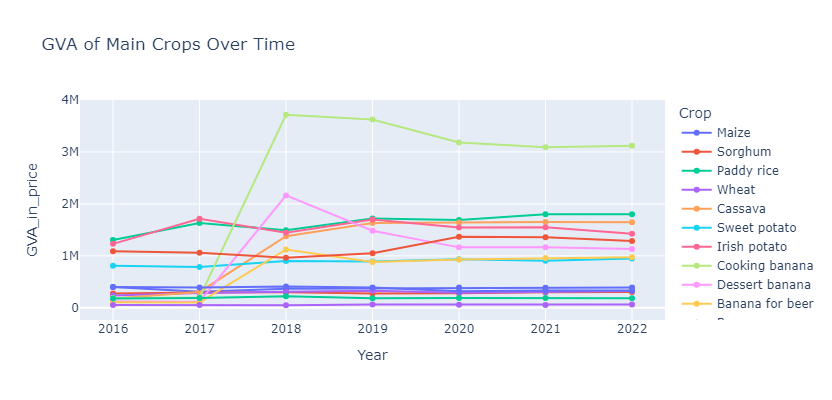

In [60]:


# Create a time series graph
fig = px.line(df4, x='Year', y='GVA_in_price',
              color='Crop', markers=True, title='GVA of Main Crops Over Time')

# Adjust the height of the graph
fig.update_layout(height=400)  # You can adjust the height to your preference

# Show the graph
fig.show()


In [61]:
#GRAPH

# Create a list of unique crops for the dropdown menu
crops = df4['Crop'].unique()

# Initialize the Dash app
app = dash.Dash(__name__)

# Layout of the app
app.layout = html.Div([
    dcc.Dropdown(
        id='crop-dropdown',
        options=[{'label': Crop, 'value': Crop} for Crop in crops],
        value=crops[0],  # Set the default value to the first crop
        multi=False
    ),
    dcc.Graph(
        id='gva-time-series',
    ),
])

# Callback to update the time series graph based on the selected crop
@app.callback(
    dash.dependencies.Output('gva-time-series', 'figure'),
    [dash.dependencies.Input('crop-dropdown', 'value')]
)
def update_time_series(selected_crop):
    # Filter the data based on the selected crop
    selected_data = df4[df4['Crop'] == selected_crop]

    # Create the time series graph for the selected crop
    fig = px.line(selected_data, x='Year', y='GVA_in_price',
                  markers=True, title=f'<b>GVA of {selected_crop} Over Time</b>')

    # Adjust the height of the graph
    fig.update_layout(height=300)

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(port=8835)


## ACTION: AGRICULTURAL INPUTS

In [62]:
df4.head(30)

Crop  Year  GVA_in_price
0        Maize  2016        402114
1        Maize  2017        309457
2        Maize  2018        365527
3        Maize  2019        373066
4        Maize  2020        389059
5        Maize  2021        387754
6        Maize  2022        390303
7      Sorghum  2016        274987
8      Sorghum  2017        296000
9      Sorghum  2018        298689
10     Sorghum  2019        274485
11     Sorghum  2020        280068
12     Sorghum  2021        299996
13     Sorghum  2022        302122
14  Paddy rice  2016       1304073
15  Paddy rice  2017       1633520
16  Paddy rice  2018       1492544
17  Paddy rice  2019       1718397
18  Paddy rice  2020       1691890
19  Paddy rice  2021       1799480
20  Paddy rice  2022       1799248
21       Wheat  2016        237012
22       Wheat  2017        282068
23       Wheat  2018        306210
24       Wheat  2019        329278
25       Wheat  2020        289132
26       Wheat  2021        303795
27       Wheat  2022        321878
28     Cassava  2016        177496
29     Cassava  2017        305145

In [63]:
import dash
from dash import dcc, html
import plotly.express as px

# Sample data for farmers
data_farmers = {
    'farmers': ['Improved seeds', 'Organic fertilizer', 'Inorganic fertilizers', 'Pesticides'],
    'Season A': [33.1, 69.7, 38.6, 19.8],
    'Season B': [8.7, 57.9, 27.5, 15.9],
    'Season C': [26.1, 82.3, 71.5, 70.1]
}

# Sample data for land
data_land = {
    'Land': ['Improved seeds', 'Organic fertilizer', 'Inorganic fertilizer', 'Pesticides'],
    'Season A': [31.5, 65.4, 36.6, 19.2],
    'Season B': [17.0, 52.1, 26.0, 14.6],
    'Season C': [18.5, 85.6, 61.4, 92.1]
}

# Sample data for agricultural inputs
data_inputs = {
    'Agricultural inputs': ['Improved seeds', 'Organic fertilizer', 'Inorganic fertilizers', 'Pesticides'],
    'Season A': [30.9, 67.4, 30.3, 15.4],
    'Season B': [16.2, 55.2, 21.9, 11.9],
    'Season C': [13.2, 83.0, 42.6, 88.9]
}

# Create DataFrames
df_farmers = pd.DataFrame(data_farmers)
df_land = pd.DataFrame(data_land)
df_inputs = pd.DataFrame(data_inputs)

# Initialize the Dash app
app = dash.Dash(__name__)

# Layout of the app
app.layout = html.Div([
    html.H1("Agricultural Dashboard"),

    # Farmers Radar Chart
    dcc.Graph(
        id='farmers-radar',
        figure=px.line_polar(df_farmers.melt(id_vars='farmers', var_name='Season', value_name='Percentage'),
                             r='Percentage',
                             theta='farmers',
                             line_close=True,
                             color='Season',
                             color_discrete_map={'Season A': 'lightgreen', 'Season B': 'skyblue', 'Season C': 'orange'},
                             labels={'farmers': 'Input', 'Percentage': 'Percentage'},
                             title='Percentage of Farmers Using Agricultural Inputs by Season',
                             text='Percentage')  # Add this line for displaying text on edges
    ),

    # Land Radar Chart
    dcc.Graph(
        id='land-radar',
        figure=px.line_polar(df_land.melt(id_vars='Land', var_name='Season', value_name='Percentage'),
                             r='Percentage',
                             theta='Land',
                             line_close=True,
                             color='Season',
                             color_discrete_map={'Season A': 'lightgreen', 'Season B': 'skyblue', 'Season C': 'orange'},
                             labels={'Land': 'Input', 'Percentage': 'Percentage'},
                             title='Percentage of Land with Agricultural Inputs by Season',
                             text='Percentage')  # Add this line for displaying text on edges
    ),

    # Agricultural Inputs Radar Chart
    dcc.Graph(
        id='inputs-radar',
        figure=px.line_polar(df_inputs.melt(id_vars='Agricultural inputs', var_name='Season', value_name='Percentage'),
                             r='Percentage',
                             theta='Agricultural inputs',
                             line_close=True,
                             color='Season',
                             color_discrete_map={'Season A': 'lightgreen', 'Season B': 'skyblue', 'Season C': 'orange'},
                             labels={'Agricultural inputs': 'Input', 'Percentage': 'Percentage'},
                             title='Percentage of Plots with Agricultural Inputs by Season',
                             text='Percentage')  # Add this line for displaying text on edges
    ),

    dcc.Interval(
        id='interval-component',
        interval=500,  # in milliseconds
        n_intervals=2
    )
])

# Run the app
if __name__ == '__main__':
    app.run_server(port=8836)
